## Import Library

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    
    !pip install spacy unidecode textblob sastrawi pyLDAvis
    !pip install --upgrade python-crfsuite gensim
    !pip install sklearn-pycrfsuite

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-28 21:13:51--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-28 21:13:51 (49.9 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-28 21:13:51--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"done"

'done'

## Text Processing

In [ ]:
!wget -P data/ https://raw.githubusercontent.com/shrfinna/TugasMKB/main/dataLabeled.json

--2022-06-28 21:16:08--  https://raw.githubusercontent.com/shrfinna/TugasMKB/main/dataLabeled.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10399667 (9.9M) [text/plain]
Saving to: ‘data/dataLabeled.json’

dataLabeled.json    100%[===================>]   9.92M  --.-KB/s    in 0.1s    

2022-06-28 21:16:08 (102 MB/s) - ‘data/dataLabeled.json’ saved [10399667/10399667]



In [ ]:
dataset = pd.read_json("data/dataLabeled.json")
# dataset.to_csv("data/dataLabeled.csv")
dataset.shape

(11500, 26)

In [ ]:
Tweet_data = pd.read_json("data/dataLabeled.json")
Tweet_data

,created_at,date,time,user_id,username,name,text,mentions,urls,photos,...,quote_url,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,label
0,2021-06-13 22:36:12 SE Asia Standard Time,2021-06-13,22:36:12,34579926,pasadenasl,Mith,@Anonymous_2024 Pemerintah harus revisi ulang ...,[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Anonymous_2024', 'name': 'An...",NaN,N
1,2021-06-13 21:52:52 SE Asia Standard Time,2021-06-13,21:52:52,1381196313493040128,stddevx,St. Devyz,"@molatv_living djarum cina bangsat gak becus, ...",[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,H
2,2021-06-13 21:48:15 SE Asia Standard Time,2021-06-13,21:48:15,785800948258004992,beige_chocolate,Cheesecakebiss,@opiedupdidup @diyaaa_nair @JanaaniBala Yang b...,[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'opiedupdidup', 'name': 'Tmay...",NaN,H
3,2021-06-13 21:31:31 SE Asia Standard Time,2021-06-13,21:31:31,2987211480,_hidayahazhar,Ù‡ÙŠØ¯Ø§ÙŠÙ‡ Ø§Ø²Ù‡Ø±,@AmeirHasif Sbb takde lg yg berani bawa isu ke...,[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AmeirHasif', 'name': 'AmeiR'...",NaN,N
4,2021-06-13 19:49:53 SE Asia Standard Time,2021-06-13,19:49:53,1394643469084160000,selamatrahmatt,Selamatrahmat(tokmat),@AdiahUsu Syukur alhamdulillah cik Usu Sa'adia...,[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AdiahUsu', 'name': ""Usu Sa'a...",NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,2021-05-15 20:27:38 SE Asia Standard Time,2021-05-15,20:27:38,1138615793069959936,ridwanshen,Iwan,Gak perlu harus menjadi seorang Muslim untuk m...,[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,N
11496,2021-05-15 20:22:23 SE Asia Standard Time,2021-05-15,20:22:23,1236589642503160064,fauzi0716,Fauzi Abdillah,Mereka tidak punya Pancasila Tapi mereka punya...,[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,H
11497,2021-05-15 20:14:10 SE Asia Standard Time,2021-05-15,20:14:10,1335699843969220096,ikanzupang3,CabutSKB2Menteri #NM,kalau d sekeliling kita saja belum mampu mewuj...,[],[],['https://pbs.twimg.com/media/E1bmZvWVoAMH1UV....,...,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,N
11498,2021-05-15 20:08:23 SE Asia Standard Time,2021-05-15,20:08:23,1087323461733650048,daunsirih5,à¹‘Û©Ûžâ€‹ ðŸ„³ðŸ„°ðŸ…„ðŸ„½ ðŸ…‚ðŸ„¸ðŸ…�ðŸ„¸ðŸ...,"@AremaNita__ Terharu boleh,,, Kita tdk boleh ...",[],[],[],...,None,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'AremaNita__', 'name': 'à¼º ê...",NaN,N


In [ ]:
df = pd.DataFrame(Tweet_data[['username','text']])
df

,username,text
0,pasadenasl,@Anonymous_2024 Pemerintah harus revisi ulang ...
1,stddevx,"@molatv_living djarum cina bangsat gak becus, ..."
2,beige_chocolate,@opiedupdidup @diyaaa_nair @JanaaniBala Yang b...
3,_hidayahazhar,@AmeirHasif Sbb takde lg yg berani bawa isu ke...
4,selamatrahmatt,@AdiahUsu Syukur alhamdulillah cik Usu Sa'adia...
...,...,...
11495,ridwanshen,Gak perlu harus menjadi seorang Muslim untuk m...
11496,fauzi0716,Mereka tidak punya Pancasila Tapi mereka punya...
11497,ikanzupang3,kalau d sekeliling kita saja belum mampu mewuj...
11498,daunsirih5,"@AremaNita__ Terharu boleh,,, Kita tdk boleh ..."


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    
df['remove_user'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [ ]:
df

,username,text,remove_user
0,pasadenasl,@Anonymous_2024 Pemerintah harus revisi ulang ...,Pemerintah harus revisi ulang syarat-syarat i...
1,stddevx,"@molatv_living djarum cina bangsat gak becus, ...","djarum cina bangsat gak becus, keluar dari In..."
2,beige_chocolate,@opiedupdidup @diyaaa_nair @JanaaniBala Yang b...,Yang buat nasi lemak strawberry orang melay...
3,_hidayahazhar,@AmeirHasif Sbb takde lg yg berani bawa isu ke...,Sbb takde lg yg berani bawa isu ke jtk ke apa...
4,selamatrahmatt,@AdiahUsu Syukur alhamdulillah cik Usu Sa'adia...,"Syukur alhamdulillah cik Usu Sa'adiah, wpun y..."
...,...,...,...
11495,ridwanshen,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...
11496,fauzi0716,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...
11497,ikanzupang3,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...
11498,daunsirih5,"@AremaNita__ Terharu boleh,,, Kita tdk boleh ...","Terharu boleh,,, Kita tdk boleh meniru cara2..."


In [ ]:
def remove(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet
df['remove_RT'] = df['remove_user'].apply(lambda x: remove(x))

In [ ]:
df

,username,text,remove_user,remove_RT
0,pasadenasl,@Anonymous_2024 Pemerintah harus revisi ulang ...,Pemerintah harus revisi ulang syarat-syarat i...,Pemerintah harus revisi ulang syarat-syarat i...
1,stddevx,"@molatv_living djarum cina bangsat gak becus, ...","djarum cina bangsat gak becus, keluar dari In...","djarum cina bangsat gak becus, keluar dari In..."
2,beige_chocolate,@opiedupdidup @diyaaa_nair @JanaaniBala Yang b...,Yang buat nasi lemak strawberry orang melay...,Yang buat nasi lemak strawberry orang melay...
3,_hidayahazhar,@AmeirHasif Sbb takde lg yg berani bawa isu ke...,Sbb takde lg yg berani bawa isu ke jtk ke apa...,Sbb takde lg yg berani bawa isu ke jtk ke apa...
4,selamatrahmatt,@AdiahUsu Syukur alhamdulillah cik Usu Sa'adia...,"Syukur alhamdulillah cik Usu Sa'adiah, wpun y...","Syukur alhamdulillah cik Usu Sa'adiah, wpun y..."
...,...,...,...,...
11495,ridwanshen,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...
11496,fauzi0716,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...
11497,ikanzupang3,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...
11498,daunsirih5,"@AremaNita__ Terharu boleh,,, Kita tdk boleh ...","Terharu boleh,,, Kita tdk boleh meniru cara2...","Terharu boleh,,, Kita tdk boleh meniru cara ..."


In [ ]:
df.drop_duplicates(subset="remove_RT", keep='first', inplace=True)

In [ ]:
df

,username,text,remove_user,remove_RT
0,pasadenasl,@Anonymous_2024 Pemerintah harus revisi ulang ...,Pemerintah harus revisi ulang syarat-syarat i...,Pemerintah harus revisi ulang syarat-syarat i...
1,stddevx,"@molatv_living djarum cina bangsat gak becus, ...","djarum cina bangsat gak becus, keluar dari In...","djarum cina bangsat gak becus, keluar dari In..."
2,beige_chocolate,@opiedupdidup @diyaaa_nair @JanaaniBala Yang b...,Yang buat nasi lemak strawberry orang melay...,Yang buat nasi lemak strawberry orang melay...
3,_hidayahazhar,@AmeirHasif Sbb takde lg yg berani bawa isu ke...,Sbb takde lg yg berani bawa isu ke jtk ke apa...,Sbb takde lg yg berani bawa isu ke jtk ke apa...
4,selamatrahmatt,@AdiahUsu Syukur alhamdulillah cik Usu Sa'adia...,"Syukur alhamdulillah cik Usu Sa'adiah, wpun y...","Syukur alhamdulillah cik Usu Sa'adiah, wpun y..."
...,...,...,...,...
11495,ridwanshen,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...
11496,fauzi0716,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...
11497,ikanzupang3,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...
11498,daunsirih5,"@AremaNita__ Terharu boleh,,, Kita tdk boleh ...","Terharu boleh,,, Kita tdk boleh meniru cara2...","Terharu boleh,,, Kita tdk boleh meniru cara ..."


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(10961, 4)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove coma
    tweet = re.sub(r',','',tweet)
    
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean

In [ ]:
df['tweet_clean'] = df['remove_RT'].apply(lambda x: clean_tweets(x))

In [ ]:
df

,username,text,remove_user,remove_RT,tweet_clean
0,pasadenasl,@Anonymous_2024 Pemerintah harus revisi ulang ...,Pemerintah harus revisi ulang syarat-syarat i...,Pemerintah harus revisi ulang syarat-syarat i...,"[perintah, revisi, ulang, syarat, investor, tk..."
1,stddevx,"@molatv_living djarum cina bangsat gak becus, ...","djarum cina bangsat gak becus, keluar dari In...","djarum cina bangsat gak becus, keluar dari In...","[djarum, cina, bangsat, gak, becus, indonesia,..."
2,beige_chocolate,@opiedupdidup @diyaaa_nair @JanaaniBala Yang b...,Yang buat nasi lemak strawberry orang melay...,Yang buat nasi lemak strawberry orang melay...,"[nasi, lemak, strawberry, orang, melayu, jugak..."
3,_hidayahazhar,@AmeirHasif Sbb takde lg yg berani bawa isu ke...,Sbb takde lg yg berani bawa isu ke jtk ke apa...,Sbb takde lg yg berani bawa isu ke jtk ke apa...,"[sbb, takde, lg, yg, berani, bawa, isu, jtk, d..."
4,selamatrahmatt,@AdiahUsu Syukur alhamdulillah cik Usu Sa'adia...,"Syukur alhamdulillah cik Usu Sa'adiah, wpun y...","Syukur alhamdulillah cik Usu Sa'adiah, wpun y...","[syukur, alhamdulillah, cik, usu, sa adiah, wp..."
...,...,...,...,...,...
11495,ridwanshen,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...,Gak perlu harus menjadi seorang Muslim untuk m...,"[gak, muslim, tolong, rakyat, palestina, butuh..."
11496,fauzi0716,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...,Mereka tidak punya Pancasila Tapi mereka punya...,"[pancasila, manusia, , yahudi, pesek, mati, be..."
11497,ikanzupang3,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...,kalau d sekeliling kita saja belum mampu mewuj...,"[d, keliling, wujud, manusia, jng, sok, bela, ..."
11498,daunsirih5,"@AremaNita__ Terharu boleh,,, Kita tdk boleh ...","Terharu boleh,,, Kita tdk boleh meniru cara2...","Terharu boleh,,, Kita tdk boleh meniru cara ...","[haru, tdk, tiru, milik, persodaraan, dlm, man..."


In [ ]:
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
df['Tweet'] = df['tweet_clean'].apply(lambda x: remove_punct(x))

In [ ]:
df.to_csv('output.csv',encoding='utf8', index=False)

In [ ]:
df.sort_values("Tweet", inplace = True)
df.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
df.to_csv('output.csv',encoding='utf8', index=False)
df

,username,text,remove_user,remove_RT,tweet_clean,Tweet
5601,ento76,@sbu_rikiman @NanangWeb @PDI_Perjuangan @DPR_R...,https://t.co/AV2zOhWU58 dibaca bos. Po...,https://t.co/AVzOhWU dibaca bos. Point...,[],
8965,iamazwarr,@kedinasanfess A ? salah satu poin cita2 bangs...,A ? salah satu poin cita2 bangsa melaksanakan...,A ? salah satu poin cita bangsa melaksanakan ...,"[a, salah, poin, cita, bangsa, laksana, tertib...",a salah poin cita bangsa laksana tertib dunia ...
7407,nkmoyuta,AAAA THANK YOU!!! Emang mereka generasi unggul...,AAAA THANK YOU!!! Emang mereka generasi unggul...,AAAA THANK YOU!!! Emang mereka generasi unggul...,"[aaa, thank, you, emang, generasi, unggul, ter...",aaa thank you emang generasi unggul terus bang...
9390,borahae1365244,@AneiraZulfa @bitxt Aaaaa dikira kpop itu sema...,Aaaaa dikira kpop itu semacam sekte sesat ka...,Aaaaa dikira kpop itu semacam sekte sesat ka...,"[aaaa, kpop, sekte, sesat, kali, ya, , , , jau...",aaaa kpop sekte sesat kali ya jauh tuhan loh t...
2088,nkrihar82459132,@ANGAFFAN6 @Mdy_Asmara1701 Aah Para Cebong Dun...,"Aah Para Cebong Dungu, Ahokers Kafir yg dend...","Aah Para Cebong Dungu, Ahokers Kafir yg dend...","[aah, cebong, dungu, ahokers, kafir, yg, denda...",aah cebong dungu ahokers kafir yg dendam kusum...
...,...,...,...,...,...,...
11003,fahmiba52398336,"Zionis Nusantara, apakah kalian tak punya rasa...","Zionis Nusantara, apakah kalian tak punya rasa...","Zionis Nusantara, apakah kalian tak punya rasa...","[zionis, nusantara, manusia, kasih, sayang, or...",zionis nusantara manusia kasih sayang orang pa...
1417,inatronin,Zionis Nusantara yahudi pesek binti cebong ban...,Zionis Nusantara yahudi pesek binti cebong ban...,Zionis Nusantara yahudi pesek binti cebong ban...,"[zionis, nusantara, yahudi, pesek, binti, cebo...",zionis nusantara yahudi pesek binti cebong ban...
10855,rodhialfalah,"""Zionis Sawo Matang"" memang benar2 ada dan arg...","""Zionis Sawo Matang"" memang benar2 ada dan arg...","""Zionis Sawo Matang"" memang benar ada dan argu...","[zionis, sawo, matang, argumen, sedih, tutup, ...",zionis sawo matang argumen sedih tutup manusia
897,lemonpedas,@LiewLipNan @izzathelmii @JazlieDawani Zionis ...,Zionis tu sbenarnya Macam bangsa cina kau l...,Zionis tu sbenarnya Macam bangsa cina kau l...,"[zionis, tu, sbenarnya, bangsa, cina, kau, la,...",zionis tu sbenarnya bangsa cina kau la lip dat...


In [ ]:
df1 = pd.DataFrame(df[['username','Tweet']])
df1

,username,Tweet
5601,ento76,
8965,iamazwarr,a salah poin cita bangsa laksana tertib dunia ...
7407,nkmoyuta,aaa thank you emang generasi unggul terus bang...
9390,borahae1365244,aaaa kpop sekte sesat kali ya jauh tuhan loh t...
2088,nkrihar82459132,aah cebong dungu ahokers kafir yg dendam kusum...
...,...,...
11003,fahmiba52398336,zionis nusantara manusia kasih sayang orang pa...
1417,inatronin,zionis nusantara yahudi pesek binti cebong ban...
10855,rodhialfalah,zionis sawo matang argumen sedih tutup manusia
897,lemonpedas,zionis tu sbenarnya bangsa cina kau la lip dat...


In [ ]:
df['username'] = df['username'].astype('category')
df['text'] = df['text'].astype('category')
df['remove_user'] = df['remove_user'].astype('category')
df['remove_RT'] = df['remove_RT'].astype('category')
# df['tweet_clean'] = df['tweet_clean'].astype('category')
df['Tweet'] = df['Tweet'].astype('category')
df['token'] = df['token'].astype('category')
df.dtypes

username       category
text           category
remove_user    category
remove_RT      category
tweet_clean      object
Tweet          category
token          category
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10455 entries, 5601 to 11070
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   username     10455 non-null  category
 1   text         10455 non-null  category
 2   remove_user  10455 non-null  category
 3   remove_RT    10455 non-null  category
 4   tweet_clean  10455 non-null  object  
 5   Tweet        10455 non-null  category
 6   token        10455 non-null  category
dtypes: category(6), object(1)
memory usage: 2.2+ MB


In [ ]:
df1 = str(df)
df1

'              username                                               text  \\\n5601            ento76  @sbu_rikiman @nanangweb @pdi_perjuangan @dpr_r...   \n8965         iamazwarr  @kedinasanfess a ? salah satu poin cita2 bangs...   \n7407          nkmoyuta  aaaa thank you!!! emang mereka generasi unggul...   \n9390    borahae1365244  @aneirazulfa @bitxt aaaaa dikira kpop itu sema...   \n2088   nkrihar82459132  @angaffan6 @mdy_asmara1701 aah para cebong dun...   \n...                ...                                                ...   \n11003  fahmiba52398336  zionis nusantara, apakah kalian tak punya rasa...   \n1417         inatronin  zionis nusantara yahudi pesek binti cebong ban...   \n10855     rodhialfalah  "zionis sawo matang" memang benar2 ada dan arg...   \n897         lemonpedas  @liewlipnan @izzathelmii @jazliedawani zionis ...   \n11070  annisa_amartani  zionis-israel sangat kejam dan biadab, kalau a...   \n\n                                             remove_user  \\

## Nomer 1

In [ ]:
dataset = pd.read_csv("data/DataMKB.csv")
X = dataset.iloc[:,[4,7,10,11,12]]

In [ ]:
# 1A
#Mengurutkan Tweets berdasarkan Retweet terbanyak
RT = X.sort_values('retweets_count', ascending=False).head()
RT

,username,mentions,replies_count,retweets_count,likes_count
6995,yashudha_naka,[],354,2005,3350
9764,dian_supolo,[],239,1867,6209
8300,jokowi,[],398,1280,7986
7372,areajulid,[],82,1034,3881
9580,kutipanrinduu_,[],317,892,4967


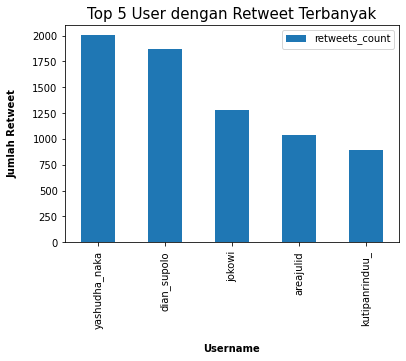

In [ ]:
plot = RT.plot(kind='bar', x='username', y='retweets_count')
plot.set_title('Top 5 User dengan Retweet Terbanyak', fontsize=15)
plot.set_xlabel('Username', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah Retweet', weight='bold', labelpad=15)

plot.tick_params(axis='x', pad=5)

Interpretasi: Berdasarkan tabel diatas diperoleh tweet dengan jumlah retweet sebanyak **2005** retweet dengan username **@yashudha_naka**. Selain itu dalam tweetannya memperoleh jumlah replies dan like masing-masing sebanyak 354 dan 3350.

In [ ]:
# 1B
#Mengurutkan Tweets berdasarkan Like terbanyak
Like = X.sort_values('likes_count', ascending=False).head()
Like

,username,mentions,replies_count,retweets_count,likes_count
8300,jokowi,[],398,1280,7986
9764,dian_supolo,[],239,1867,6209
9580,kutipanrinduu_,[],317,892,4967
7372,areajulid,[],82,1034,3881
6995,yashudha_naka,[],354,2005,3350


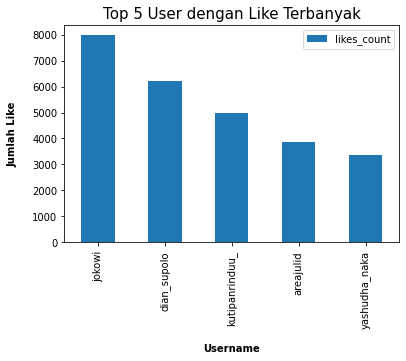

In [ ]:
plot = Like.plot(kind='bar', x='username', y='likes_count')
plot.set_title('Top 5 User dengan Like Terbanyak', fontsize=15)
plot.set_xlabel('Username', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah Like', weight='bold', labelpad=15)

plot.tick_params(axis='x', pad=5)

Interpretasi: Berdasarkan tabel diatas diperoleh tweet dengan jumlah like tertinggi sebanyak **7986** likes dengan username **@jokowi**. Selain itu dalam tweetannya memperoleh jumlah replies dan retweet masing-masing sebanyak 398 dan 1280.

In [ ]:
# 1C
#Mengurutkan Tweets berdasarkan Replay terbanyak
Rep = X.sort_values('replies_count', ascending=False).head()
Rep

,username,mentions,replies_count,retweets_count,likes_count
10805,republikaonline,[],693,819,3023
8300,jokowi,[],398,1280,7986
6995,yashudha_naka,[],354,2005,3350
9580,kutipanrinduu_,[],317,892,4967
9764,dian_supolo,[],239,1867,6209


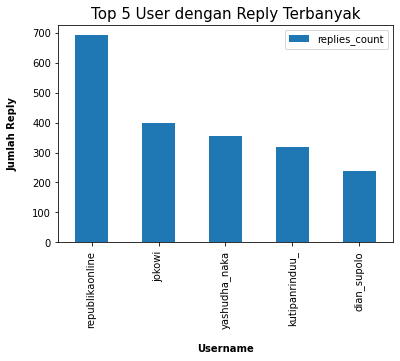

In [ ]:
plot = Rep.plot(kind='bar', x='username', y='replies_count')
plot.set_title('Top 5 User dengan Reply Terbanyak', fontsize=15)
plot.set_xlabel('Username', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah Reply', weight='bold', labelpad=15)

plot.tick_params(axis='x', pad=5)

Interpretasi: Berdasarkan tabel diatas diperoleh tweet dengan jumlah replies tertinggi sebanyak **693** replies dengan username **@replubikaonline**. Selain itu dalam tweetannya memperoleh jumlah retweet dan like masing-masing sebanyak 819 dan 3023.

In [ ]:
# 1D
# Mengurutkan Tweets Berdasarkan Username yang Paling Sering di Mention 
Mention = X.value_counts('mentions', ascending=False).head()
Mention

mentions
[]                                                                                                                                                                                                                                                                                                                                       10822
[{'screen_name': 'jokowi', 'name': 'joko widodo', 'id': '366987179'}]                                                                                                                                                                                                                                                                       44
[{'screen_name': 'dennysiregar7', 'name': 'denny siregar', 'id': '4780649298'}]                                                                                                                                                                                                                                                  

Interpretasi: Berdasarkan hasil diatas yaitu dengan menggunakan value_counts (menghitung berapa kali sebuah value terdapat dalam dataset) diperoleh username yang paling sering dimention adalah akun **@jokowi** dengan total mention sebanyak 44.

In [ ]:
# 1E 
# Top 10 kata menggunakan unigram, bigram dan trigam dalam bentuk wordcloud dan bar chart
from nltk.util import ngrams

10 Kata Yang Paling Sering Muncul

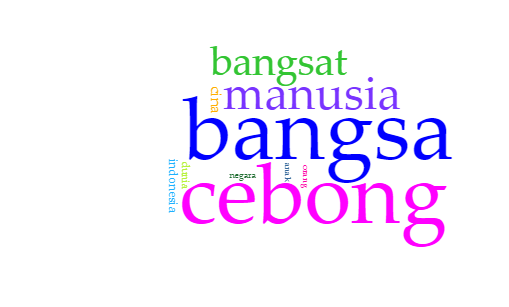 

In [ ]:
hate = df1[df1['Tweet']=='h']

In [ ]:
hate.keys()

Index(['username', 'Tweet', 'token'], dtype='object')

In [ ]:
unigrams = []
for x in np.arange(len(df1)):
    Y = ngrams(df1,1)
    for y in Y:
        unigrams.append(y)
        
unigrams = pd.DataFrame(unigrams)
unigrams = unigrams.rename(columns={0:'uni'})
unigrams.head(3)
unigrams.value_counts()[0:10]

uni
       5329517
a      1432624
n       739670
.       704633
i       564485
s       502197
e       474946
u       330905
t       330905
r       303654
dtype: int64

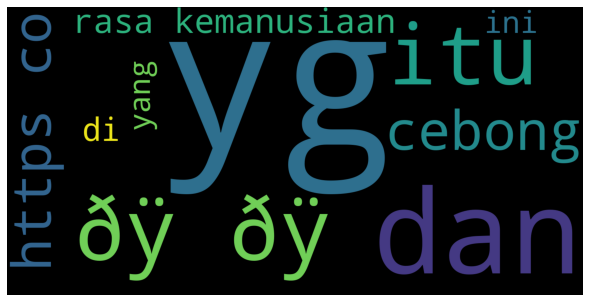

In [ ]:
Unigram = [ ]
x=''.join(df['text'])
word_cloud=wordcloud.WordCloud(background_color='black',mode='RGB', width=1600, height=800, max_words=10).generate(x)
plt.figure(figsize=(8,4))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import nltk as nltk
import wordcloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
bigrams = []
for x in np.arange(len(df1)):
    Y = ngrams(df1,2)
    for y in Y:
        bigrams.append(y)
        
bigrams = pd.DataFrame(bigrams)
bigrams["big"] = bigrams[0]+ '_' + bigrams[1]
bigrams.head(3)
bigrams = bigrams.drop(columns =[0,1])

In [ ]:
bi = pd.DataFrame(bigrams.value_counts()[0:10],columns=['amount'])
bi = bi.reset_index()

In [ ]:
bigtext = ''
for x in np.arange(len(bi)):
    bigtext = bigtext + ((bi.big[x] + ' ') * bi.amount[x])

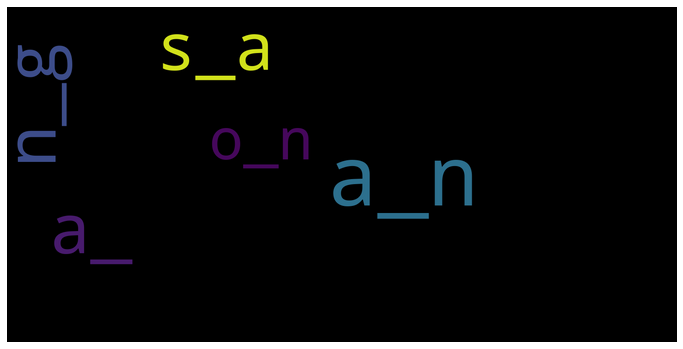

In [ ]:
wordcloud = WordCloud(max_words=10,width=1600, height=800, max_font_size=200, background_color='black',collocations=False)
wordcloud.generate(bigtext)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("off")
plt.show()

In [ ]:
# 1F
# Analisis Deret Waktu Berkaitan dengan Peak Time
Y = dataset.iloc[:,[0,2]]
Waktu = Y.sort_values('created_at', ascending=False)
Waktu

Interpretasi: Tanggal dengan konten hatespeech terbanyak adalah 2021-06-13.

## Nomer 2

Term Frequency-Inverse Document Frequency (TF-IDF) adalah metode yang 
digunakan untuk menghitung bobot setiap kata yang telah dianalisis. Model pembobotan TF-IDF merupakan metode yang mengintegrasikan model term frequency (TF) dan inverse 
document frequency (IDF). Tahap TF merupakan cara menentukan bobot setiap kata (term)
pada suatu dokumen berdasarkan jumlah kemunculannya dalam dokumen tersebut. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.corpus as corpus

TF

In [ ]:
documentA = 'aaa thank you emang generasi unggul terus bangsa wkwk oalah bener sih ten liat public speaking n bahahahah bismillah ten dikenalin mamah papah'
documentB = 'abdi beliau bangsa indonesia inspirasi generasi terus juang indonesia raya hutlemhannasri'

In [ ]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [ ]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [ ]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [ ]:
from nltk.corpus import stopwords
stopwords.words('indonesian')

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [ ]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

IDF

In [ ]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [ ]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

In [ ]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [ ]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df

,aaa,abdi,bahahahah,bangsa,beliau,bener,bismillah,dikenalin,emang,generasi,...,public,raya,sih,speaking,ten,terus,thank,unggul,wkwk,you
0,0.210731,0.000000,0.210731,0.149937,0.000000,0.210731,0.210731,0.210731,0.210731,0.149937,...,0.210731,0.000000,0.210731,0.210731,0.421462,0.149937,0.210731,0.210731,0.210731,0.210731
1,0.000000,0.294644,0.000000,0.209642,0.294644,0.000000,0.000000,0.000000,0.000000,0.209642,...,0.000000,0.294644,0.000000,0.000000,0.000000,0.209642,0.000000,0.000000,0.000000,0.000000


## Nomer 3

K-Means merupakan metode data clustering yang digolongkan sebagai metode pengklasifikasian yang bersifat unsupervised (tanpa arahan). Pengkategorian metode-metode pengklasifikasian data antara supervised dan unsupervised classification didasarkan pada adanya dataset yang data itemnya sudah sejak awal mempunyai label kelas dan dataset yang data itemnya tidak mempunyai label kelas. Untuk data yang sudah mempunyai label kelas, metode pengklasifikasian yang digunakan merupakan metode supervised classification dan untuk data yang belum mempunyai label kelas, metode pengklasifikasian yang digunakan adalah metode unsupervised classification.

Berikut Pseudocode K-Menas Clustering: 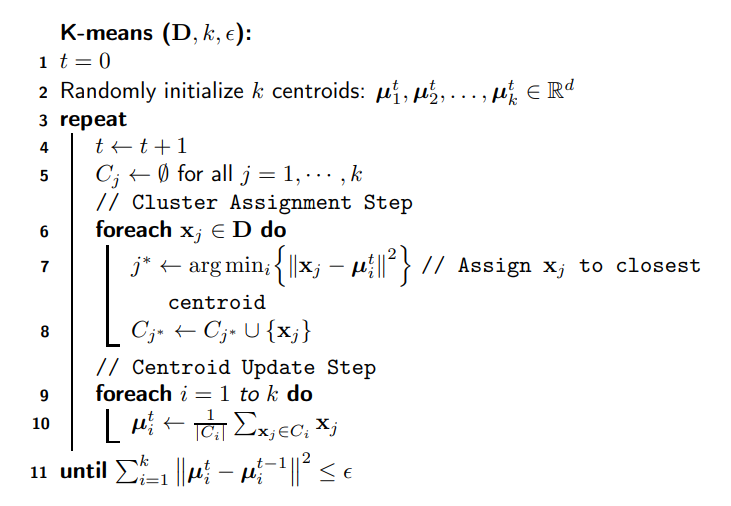

Contoh perhitungan manual sederhana

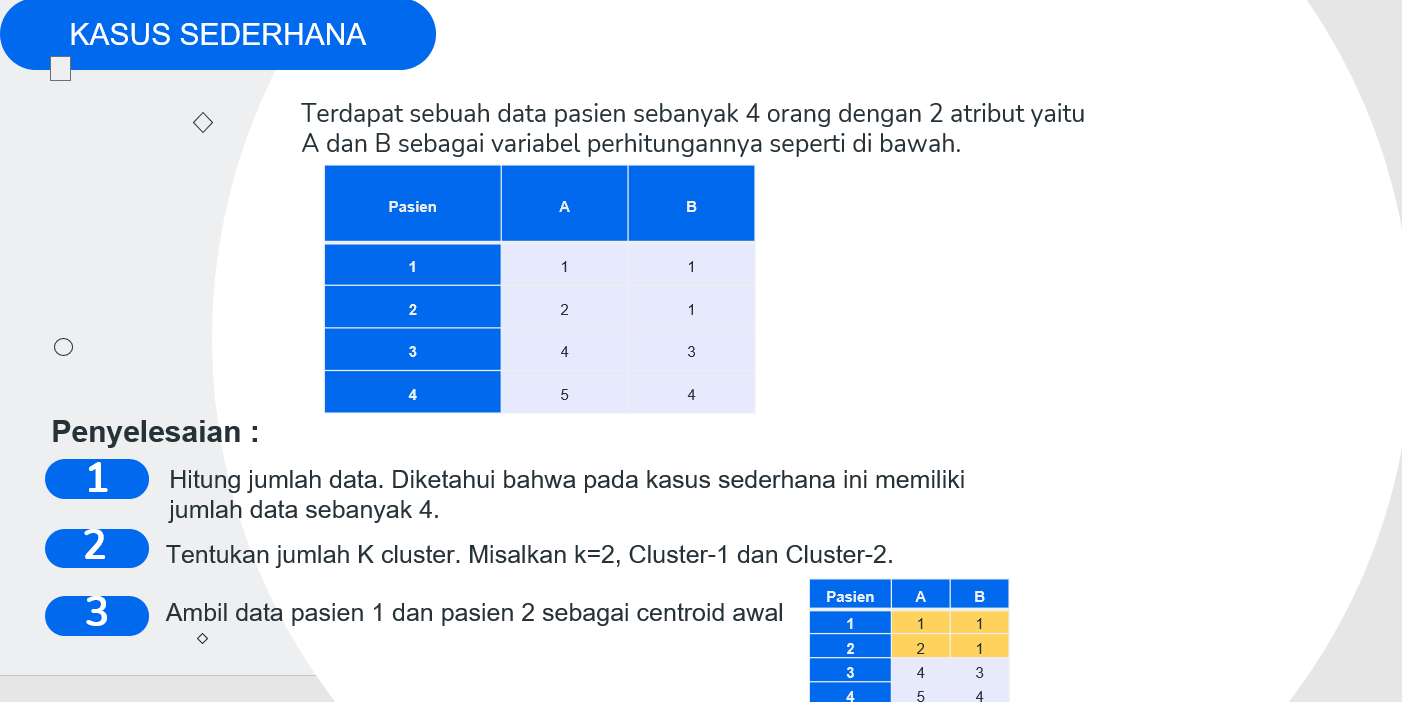

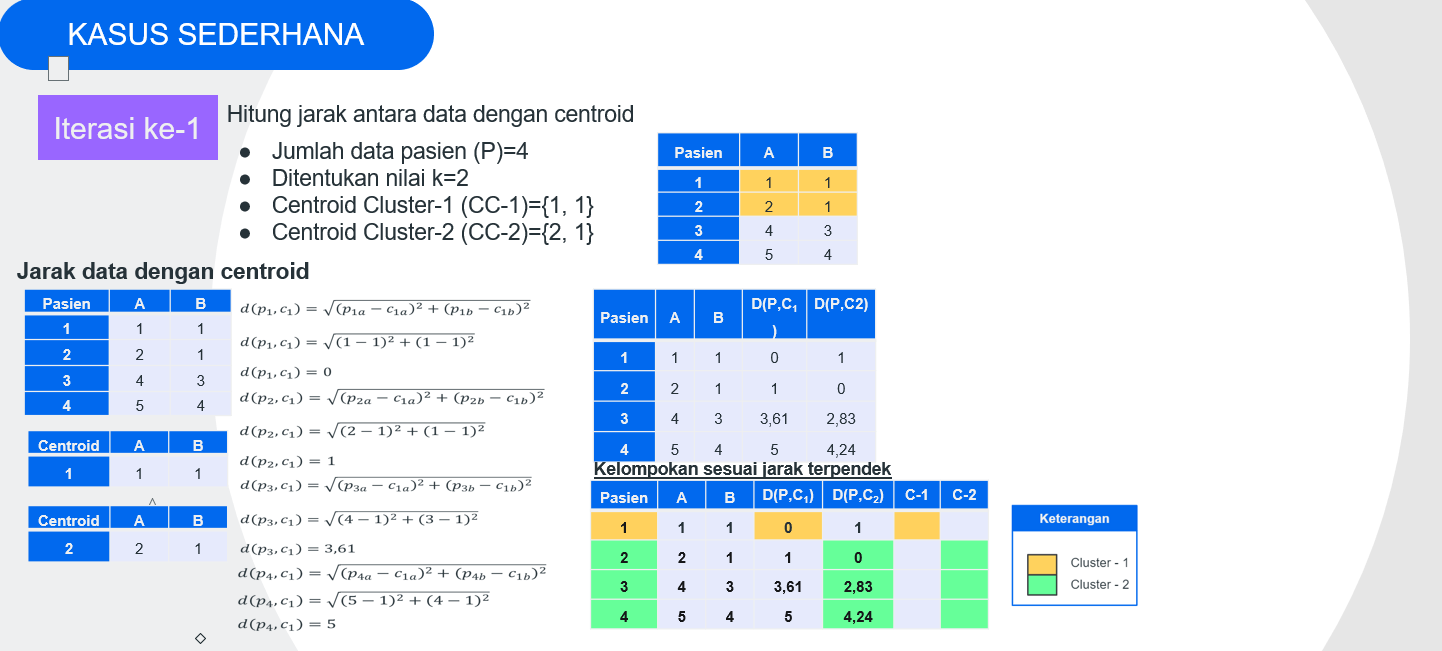

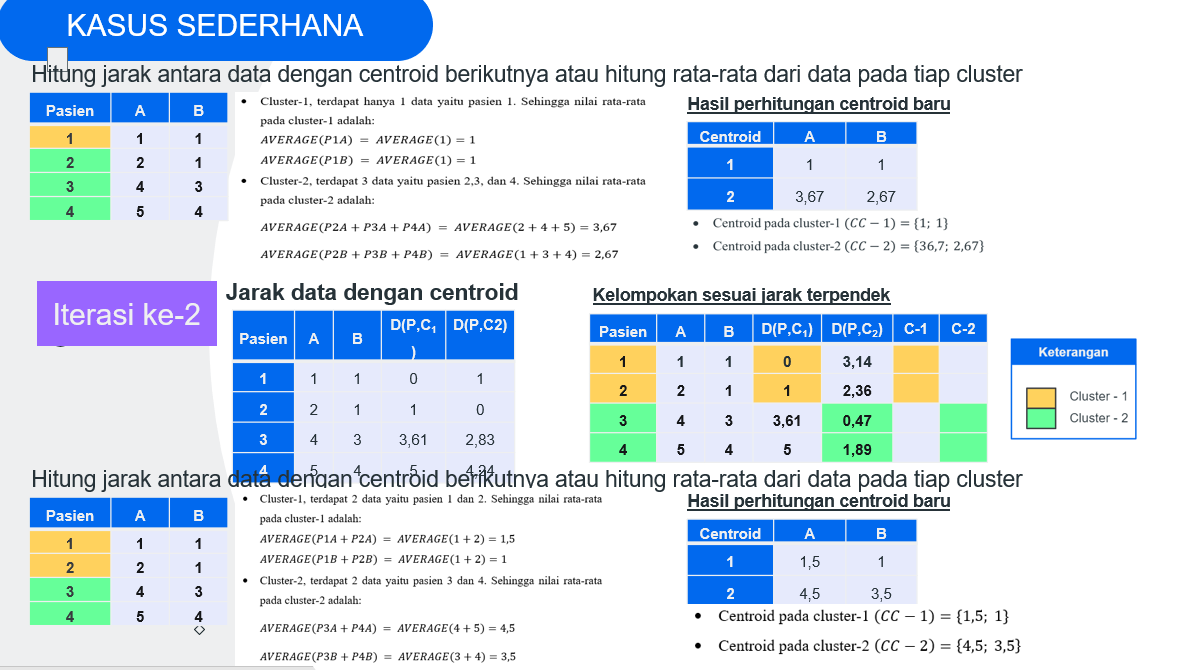

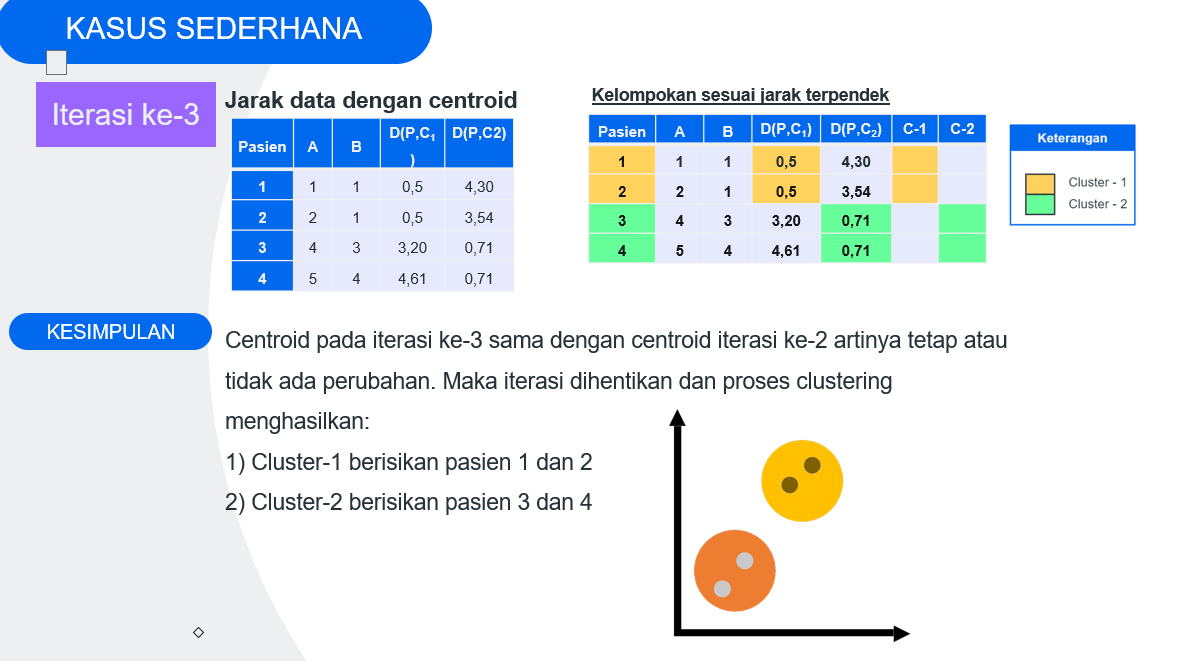

**Kelebihan:**

*   Hasil dari Kmeans selalu berubah ubah(dikarenakan tidak unik)
*   Sulit meraih global optimum
*   Cepat dalam proses clustering
*   Sensitif terhadap nilai centroid


**Kekurangan:**

*   Cluster model berbeda ditemukan
*   Sulit untuk memilih jumlah cluster yang tepat
*   Overlapping
*   Kegagalan dalam konverge

In [ ]:
pip install "scikit-learn==0.19.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 7.3 MB/s 
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn ... error
  Rolling back uninstall of scikit-learn
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~cikit_learn-1.0.2.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/
   from /usr/local/lib/python3.7/dist-packages/~cikit_learn.libs
  Moving to /usr/local/lib/python3.7/dist-packages/sklearn/
   from /usr/local/lib/python3.7/dist-packages/~klearn
ERROR: Command errored out with exit status 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
import io

In [ ]:
df = pd.DataFrame(Tweet_data[['username','text']])
df

In [ ]:
df2 = pd.read_csv('data/DataMKB.csv')
X1 = df.iloc[1::,[11,12]].values

# X = dataset.iloc[:,[4,7,10,11,12]]

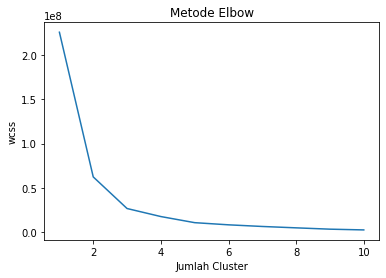

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah Cluster")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X1)

# visualisasi
plt.scatter(X(y_kmeans ==0, 0), X(y_kmeans == 0, 1), s=100,
            c= 'red', label= 'Cluster 1')
plt.scatter(X(y_kmeans ==1, 0), X(y_kmeans == 1, 1), s=100,
            c= 'blue', label= 'Cluster 2')
plt.scatter(X(y_kmeans ==2, 0), X(y_kmeans == 2, 1), s=100,
            c= 'green', label= 'Cluster 3')
plt.scatter(kmeans, cluster_centers_[:,0], kmeans, cluster_centers_[:,1],
            s=300, c='yellow', label= 'Centroids')

TypeError: ignored

In [ ]:
#instantiate the KMeans models#
km = KMeans(n_clusters=5, random_state=42)
#
#Fit the Kmeans model
#
km.fit_predict(X1)
#
#Calculate Silhoutte Score
#
score = silhoutte_score(X1, km.labels_)
#
#Print the score
#
print('Silhoutter Score: %.2f' % score)

NameError: ignored

## Nomer 4

Algoritma K-Nearest Neighbor (KNN) adalah sebuah metode untuk melakukan klasifikasi terhadap objek yang berdasarkan dari data pembelajaran yang jaraknya paling dekat dengan objek tersebut. KNN merupakan algoritma  supervised learning dimana hasil dari query instance yang baru diklasifikan berdasarkan mayoritas dari kategori pada algoritma KNN. Dimana kelas yang paling banyak muncul yang nantinya akan menjadi kelas hasil dari klasifikasi. 